# Sesión 03: Algorítmos no supervisados

## Reto 01: Construir funciones para nuestra librería de utilidades

PASO 1: Construye una función que calcula la distancia euclídea entre dos conjuntos de observaciones:

In [1]:
import numpy as np

def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    #print(dataset.shape[0])
    #print('------')
    #print(distancias)
    #print('------')
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter]) ## Busca una función de numpy para calcular la norma
    return distancias

In [2]:
#Prueba de distancia euclidiana:
muestra = np.array([1,2,3,4]) # Prueba la función con varios puntos
dataset = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])
distancias = distEuclidiana(muestra, dataset)
print(distancias)

[[0.]
 [2.]
 [4.]]


PASO 2: Definir una función que determine el centroide más cercano a un punto muestral

In [3]:
def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclidiana(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias) ## Busca una función de Numpy para encontrar el argumento mínimo de un array
    return centroideCercano

In [4]:
#Prueba de centroide mas cercano:
muestra = np.array([1,2,3,4])
centroides = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])
resultado = centroideCercano(muestra, centroides)
print("El centroide más cercano es el ubicado en el índice: "+str(resultado))

El centroide más cercano es el ubicado en el índice: 0


PASO 3: Define una función que clasifique todas las muestras con base en el centroide más cercano

In [5]:
def clasificarPorCentroides(muestras, centroides):
    resultado = np.zeros((muestras.shape[0],1))
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(muestras[counter], centroides)
    return resultado

In [6]:
#Prueba de todos los centroides vs todas las muestras.
muestras = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])

centroides = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])

resultados = clasificarPorCentroides(muestras,centroides)
print(resultados)

[[0.]
 [1.]
 [2.]]


## Ejemplo 01: Entrenamiento de K-Means

Este ejemplo simple muestra como es que se puede hacer la división entre entrenamiento / prueba y como se entrena por medio de k-means usando la librería de Sklearn

In [7]:
import MLUtilities as mlu

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

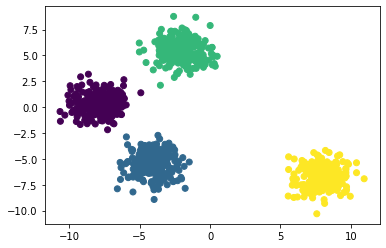

In [9]:
x, y = make_blobs(n_samples=1000, centers=4, n_features=2)
mlu.plt.scatter(x[:,0], x[:,1], c=y)
mlu.plt.show()

Utilizaremos la función KMeans de Sklearn para aplicar la técnica no supervisada:

In [10]:
from sklearn.cluster import KMeans

Tomamos el dataset de entrenamiento y ajustamos los centroides. K es el número de clases que queremos, por ejemplo: n_clusters = 4 es para 4 clases

In [11]:
#Dividimos entre train y test.
x_train, x_test, y_train, y_test = mlu.train_test_split(x,y,test_size=0.4)

[[-3.99292163 -5.39566016]
 [-2.13441645  5.49536139]
 [ 7.90169808 -6.91034461]
 [-7.91410231  0.47312618]]


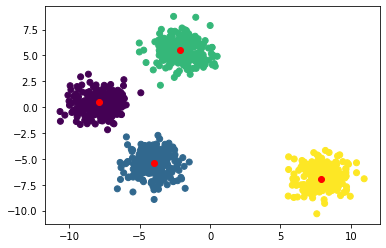

In [12]:
# Definimos el número de centroides a determinar
K = 4

#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = K).fit(x_train)

#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)

mlu.plt.scatter(x[:,0], x[:,1], c=y)
mlu.plt.scatter(centroides[:,0],centroides[:,1],color='red')
mlu.plt.show()

$accuracy = \frac{num\ muestras - num\ errores}{num\ muestras} \times 100$

## Reto 02: Clasificación y desempeño

In [13]:
import MLUtilities as mlu
from sklearn.datasets.samples_generator import make_blobs

In [14]:
?np.where

Definir una función que filtre los datos con base en la categoría esperada a la que pertenecen

In [41]:
def separarDatos(muestras, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return muestras[indices], valoresEsperados[indices]

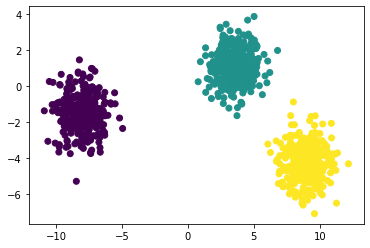

In [42]:
# Prueba de la función
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)
mlu.plt.scatter(x[:,0], x[:,1], c=y)
mlu.plt.show()

In [43]:
print(x)

[[-7.75947422 -1.44518992]
 [ 8.44501206 -2.59195497]
 [ 3.04437747  1.52902988]
 ...
 [ 9.38912772 -5.38132132]
 [ 3.24534382  0.3568216 ]
 [-8.144031   -1.49784961]]


La siguiente función calcula la moda de un conjunto de datos y nos será útil para calcular el accuracy de nuestra clasificación

In [44]:
muestrasCon1, valoresEsperadosCon1 = separarDatos(x,y,0) # Cambia el argumento "valorAFiltrar"
print(valoresEsperadosCon1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [45]:
from scipy import stats

def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1) ## Identifica la función que obteien la moda
    return moda[0]

Código para obtener la accuracy de una muestra con K medias
Este código primero extrae el numero de muestras, luego los resultados de clasificación, luego la moda y busca con np.where donde los resultados son diferentes a la moda, esos son los indices de errores.

Luego entonces, la cantidad de errores es el tamaño de los resultados donde los indicesErrores apuntan. finalmente, la Accuracy la calculamos como:

$accuracy = \frac{numMuestras - cantidadErrores}{numMuestras} \times 100 $

In [46]:
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]
    
    resultados = clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)
    
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras-cantidadErrores)/numMuestras)*100
    return accuracy

Vamos a probar la función anterior. Para ello, observa el scatter plot de arriba, y elige los centroides manualmente con "centroidesDummy". si pones el centroide dummy 1 y 2 muy cerca, la accuracy va a bajar considerablemente. si pones el centroide dummy 1 en medio de una clase, y el centroide 2 muy lejos, la accuracy será de 100%

In [47]:
centroidesDummy = np.array([[4,9]       #Centroide dummy 1
                            ,[-0.5,-10]])   #Centroide dummy 2
accuracy = obtenerAccuracy_kmedias(x,centroidesDummy)
print(accuracy)

66.4


## Ejemplo 2: Sistemas de recomendación

Este es un sistema de recomendación: los sistemas de recomendación estan en todos lados (netflix, amazon, etc), y vamos a crear uno basado en K-medias. Para ello, vamos empezando por cargar un dataset de películas en formato CSV.

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [49]:
df_peliculas = pd.read_csv('dataset_peliculas.csv')
df_peliculas

,Nombre,cantidad de accion,cantidad de romance,tipo
0,Robocop,0.90,0.00,accion
1,Terminator,0.88,0.10,accion
2,Dia de la independencia,0.90,0.11,accion
3,Mision Imposible,0.90,0.11,accion
4,Bourne,0.90,0.20,accion
5,Rambo,1.00,0.00,accion
6,Rocky,0.95,0.40,accion
7,Leopold y Kate,0.10,1.00,romance
8,Diario de una pasión,0.10,0.90,romance
9,Operación Dragon,0.75,0.00,accion


### Transformando en datasets de entrenamiento y prueba.

Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [50]:
x = df_peliculas[['cantidad de accion', 'cantidad de romance']].to_numpy()
y = df_peliculas['tipo'].map({
    'accion':0,
    'romance':1
}).to_numpy()
# Otra alternativa: y = df_peliculas["tipo"].get_dummies()

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

### Centroides.
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [51]:
modelo_kmeans = KMeans(n_clusters = 2).fit(x)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[0.125      0.9175    ]
 [0.89857143 0.14785714]]


### Sistema de recomendación.
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesión.

In [52]:
import MLUtilities as mlu
import numpy as np

Esta función va a recibir la lista de todas las peliculas (solo el texto), los datos de todas las películas (igual que como sacamos X), la pelicula ejemplo (Los valores de cantidad de acción y cantidad de romance), y los centroides de Kmeans.

In [53]:
def recomiendamePeliculas(listaDePeliculas,datosPeliculas,peliculaEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = centroideCercano(peliculaEjemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = clasificarPorCentroides(datosPeliculas, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return listaDePeliculas[indices]

### Recomiendame una película!
Elige un índice del dataframe (por decir algo... 5), y extrae la película que elegiste. Luego extrae sus características, y pide las recomendaciones!

In [54]:
#Sientete libre de cambiar este valor.
indice_df = 15

#Extrae la película que deseas del dataframe.
peliculaElegida = df_peliculas.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaPelicula = peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendamePeliculas(df_peliculas['Nombre'],x, caracteristicaPelicula, centroides)

#E imprime lo que hallaste!
print("Porque viste "+peliculaElegida['Nombre']+" te recomendamos ...")
print(recomendaciones.head())

Porque viste Sherlock Holmes te recomendamos ...
0                    Robocop
1                 Terminator
2    Dia de la independencia
3           Mision Imposible
4                     Bourne
Name: Nombre, dtype: object


### Reto para Recomendaciones de Spotify

In [55]:
# Lectura del .csv
artistas = pd.read_csv('data_by_artist_o.csv')
artistas.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,5 Seconds of Summer,0.043567,0.547308,195593.0769,0.804585,0.000016,0.181711,-4.599892,0.104403,141.883923,0.520938,61.015385
1,50 Cent,0.122386,0.695039,234964.0899,0.762388,0.000548,0.198361,-4.149427,0.259516,105.929427,0.589770,52.342697
2,AC/DC,0.027054,0.476390,258998.6163,0.847727,0.210036,0.280974,-4.818866,0.069395,128.038802,0.508220,51.401163
3,ACOT,0.000319,0.730000,169912.0000,0.567000,0.000009,0.105000,-8.085000,0.058700,119.997000,0.171000,62.000000
4,AFI,0.006557,0.390139,187259.2222,0.905722,0.031634,0.222553,-5.111389,0.087367,127.025750,0.444339,42.222222


In [56]:
artistas['popularity'] = artistas['popularity'].round()
artistas.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,5 Seconds of Summer,0.043567,0.547308,195593.0769,0.804585,0.000016,0.181711,-4.599892,0.104403,141.883923,0.520938,61.0
1,50 Cent,0.122386,0.695039,234964.0899,0.762388,0.000548,0.198361,-4.149427,0.259516,105.929427,0.589770,52.0
2,AC/DC,0.027054,0.476390,258998.6163,0.847727,0.210036,0.280974,-4.818866,0.069395,128.038802,0.508220,51.0
3,ACOT,0.000319,0.730000,169912.0000,0.567000,0.000009,0.105000,-8.085000,0.058700,119.997000,0.171000,62.0
4,AFI,0.006557,0.390139,187259.2222,0.905722,0.031634,0.222553,-5.111389,0.087367,127.025750,0.444339,42.0


In [57]:
print(artistas['popularity'].describe())
# tenemos entonces una popularidad en un rango de 0 a 100 #12
# siendo así podemos asignar por rangas una variable de tipo discreta (cualitativa)

#Propuesta de rangos.
muy_popular  = [81,100] #1
popular      = [61,80]  #2
normal       = [41,60]  #3
poco_popular = [21,40]  #4
nada_popular = [0,20]   #5

criteria = [artistas['popularity'].between(0,20), artistas['popularity'].between(21, 40), 
            artistas['popularity'].between(41,60),artistas['popularity'].between(61,80),
            artistas['popularity'].between(81,100)]
values = [1, 2, 3,4,5]

artistas['popularidad_nom'] = np.select(criteria, values, 0)

#artistas['popularidad_nom'] = artistas['popularity'].map({range(0,20):1,range(21,40):2,range(41,60):3,range(61,80):4,range(81,100):5})
artistas.head()

count    27904.000000
mean        34.175459
std         22.260763
min          0.000000
25%         12.000000
50%         39.000000
75%         51.000000
max         93.000000
Name: popularity, dtype: float64


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,popularidad_nom
0,5 Seconds of Summer,0.043567,0.547308,195593.0769,0.804585,0.000016,0.181711,-4.599892,0.104403,141.883923,0.520938,61.0,4
1,50 Cent,0.122386,0.695039,234964.0899,0.762388,0.000548,0.198361,-4.149427,0.259516,105.929427,0.589770,52.0,3
2,AC/DC,0.027054,0.476390,258998.6163,0.847727,0.210036,0.280974,-4.818866,0.069395,128.038802,0.508220,51.0,3
3,ACOT,0.000319,0.730000,169912.0000,0.567000,0.000009,0.105000,-8.085000,0.058700,119.997000,0.171000,62.0,4
4,AFI,0.006557,0.390139,187259.2222,0.905722,0.031634,0.222553,-5.111389,0.087367,127.025750,0.444339,42.0,3


In [58]:
np.linspace(0,8)

array([0.        , 0.16326531, 0.32653061, 0.48979592, 0.65306122,
       0.81632653, 0.97959184, 1.14285714, 1.30612245, 1.46938776,
       1.63265306, 1.79591837, 1.95918367, 2.12244898, 2.28571429,
       2.44897959, 2.6122449 , 2.7755102 , 2.93877551, 3.10204082,
       3.26530612, 3.42857143, 3.59183673, 3.75510204, 3.91836735,
       4.08163265, 4.24489796, 4.40816327, 4.57142857, 4.73469388,
       4.89795918, 5.06122449, 5.2244898 , 5.3877551 , 5.55102041,
       5.71428571, 5.87755102, 6.04081633, 6.20408163, 6.36734694,
       6.53061224, 6.69387755, 6.85714286, 7.02040816, 7.18367347,
       7.34693878, 7.51020408, 7.67346939, 7.83673469, 8.        ])

In [59]:
artistas.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,popularidad_nom
count,27904.000000,27904.000000,2.790400e+04,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000,27904.000000
mean,0.496479,0.545725,2.395229e+05,0.497910,0.175348,0.202326,-11.156041,0.093758,115.846475,0.511301,34.175459,2.289098
std,0.370088,0.176981,1.219339e+05,0.255476,0.298943,0.141083,5.793669,0.111333,25.010315,0.244737,22.260763,0.999029
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.121500,0.430000,1.824638e+05,0.283000,0.000004,0.110023,-14.010000,0.039200,99.335877,0.327000,12.000000,1.000000
50%,0.475000,0.556298,2.190482e+05,0.506000,0.001900,0.161000,-10.082900,0.052163,115.339267,0.522000,39.000000,2.000000
75%,0.893000,0.675000,2.689488e+05,0.704000,0.217141,0.247000,-6.881122,0.095200,129.842250,0.701585,51.000000,3.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,5.000000


In [60]:
artistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27904 entries, 0 to 27903
Data columns (total 13 columns):
artists             27904 non-null object
acousticness        27904 non-null float64
danceability        27904 non-null float64
duration_ms         27904 non-null float64
energy              27904 non-null float64
instrumentalness    27904 non-null float64
liveness            27904 non-null float64
loudness            27904 non-null float64
speechiness         27904 non-null float64
tempo               27904 non-null float64
valence             27904 non-null float64
popularity          27904 non-null float64
popularidad_nom     27904 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 2.8+ MB


In [61]:
len(artistas)

27904

### Division de los datos.



In [62]:
x = artistas[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']].to_numpy()
y = artistas['popularidad_nom'].to_numpy()
# Otra alternativa: y = df_peliculas["tipo"].get_dummies()

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

### Implementación de K-Means

In [63]:
modelo_kmeans = KMeans(n_clusters = 20).fit(x)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[ 3.69401029e-01  5.66212110e-01  2.35045802e+05  5.71253271e-01
   1.03761850e-01  1.90946487e-01 -9.56115705e+00  8.73707295e-02
   1.17826870e+02  5.09539266e-01]
 [ 6.34188787e-01  4.02875483e-01  5.44292650e+05  3.60771946e-01
   4.24906388e-01  2.25898940e-01 -1.60878257e+01  9.29825101e-02
   1.08648437e+02  2.86973627e-01]
 [ 7.73022689e-01  4.44945556e-01  1.52956740e+06  2.73181356e-01
   1.46648151e-01  2.06101000e-01 -1.74933456e+01  3.21615222e-01
   9.20055378e+01  2.90092611e-01]
 [ 4.60137626e-01  5.15411737e-01  3.85052833e+05  4.91829964e-01
   3.39268812e-01  1.96253107e-01 -1.26543602e+01  8.07090102e-02
   1.14028220e+02  4.15639474e-01]
 [ 7.14772970e-01  4.98760832e-01  7.58593591e+04  3.28749754e-01
   3.22577541e-01  2.48676449e-01 -1.63932797e+01  1.55178882e-01
   1.05945087e+02  4.82348543e-01]
 [ 9.53500000e-01  1.16350000e-01  4.19514600e+06  5.37100000e-01
   7.81000000e-01  2.11500000e-01 -2.06705000e+01  9.31000000e-02
   1.08846000e+02  2.73500000e-04

In [64]:
def recomiendameArtista(lista_artistas,datos_artista,artista_Ejemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = centroideCercano(artista_Ejemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = clasificarPorCentroides(datos_artista, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return lista_artistas[indices]

In [65]:
artistas.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'popularidad_nom'],
      dtype='object')

In [73]:
#Sientete libre de cambiar este valor.
indice_df = 24082

#Extrae la película que deseas del dataframe.
artista_elegido = artistas.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristica_artista = artista_elegido[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendameArtista(artistas['artists'],x, caracteristica_artista, centroides)

#E imprime lo que hallaste!
print("Porque escuchaste "+artista_elegido['artists']+" te recomendamos ...")
print(recomendaciones.head())

Porque escuchaste The Beatles te recomendamos ...
0     5 Seconds of Summer
4                     AFI
21       Abbasuddin Ahmed
31          Abdulial Mahi
32             Abdülkerim
Name: artists, dtype: object


In [72]:
artistas[artistas['artists'] == 'The Beatles']

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,popularidad_nom
24082,The Beatles,0.359534,0.522404,174591.257,0.546576,0.052255,0.221973,-9.687188,0.053337,121.252759,0.619537,47.0,3
